# Guided Project #19
# Building A Handwritten Digits Classifier

In this Guided Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first lesson in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks [here](https://arxiv.org/pdf/1803.01164.pdf).

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

### 1. Working with image data
Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array and pass the result into that into the numpy.reshape() function:

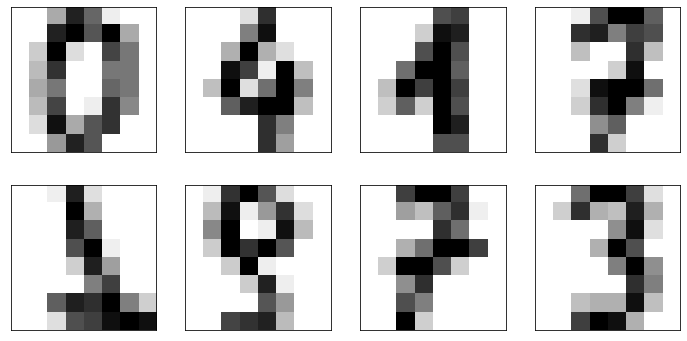

In [230]:
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()
data = pd.DataFrame(digits['data'])
target = pd.Series(digits['target'])

fig, axs = plt.subplots(2, 4, figsize=(12,6))
image_rows = [[0, 100, 200, 300],
              [1000, 1100, 1200, 1300]]

for r in range(2):
    for c in range(4):
        ax = axs[r][c]
        im = image_rows[r][c]
        im_data = data.iloc[im].values.reshape(8,8)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(im_data, cmap='gray_r')
        

### 2. Predicting with K-Nearest Neighbor model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. K-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

We can use the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) package to train and test k-nearest neighbors models.

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def train(data, target, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, target)
    return knn

def test(model, test_data, target):
    predictions = model.predict(test_data)
    accuracy = accuracy_score(target, predictions)
    return accuracy
    
def cross_validate(data, taget, k):
    fold_size = len(data)//4
    d1 = data.iloc[:fold_size,:]
    d2 = data.iloc[fold_size:2*fold_size,:]
    d3 = data.iloc[2*fold_size:3*fold_size,:]
    d4 = data.iloc[3*fold_size:,:]

    accuracies = []
    rmses = []
    
    for d in [d1,d2,d3,d4]:
        test_data = d
        test_labels = target[target.index.isin(test_data.index)]
        train_data = data[~data.index.isin(test_data.index)]
        train_labels = target[~target.index.isin(test_data.index)]
        
        model = train(train_data, train_labels, k)
        accuracy = test(model, test_data, test_labels)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

accs = [cross_validate(data, target, k) for k in range(1,20)]
ks = range(1,20)

Text(0, 0.5, 'Accuracy')

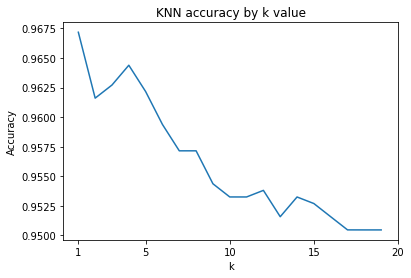

In [232]:
plt.plot(ks, accs)
plt.xticks([1,5,10,15,20])
plt.title('KNN accuracy by k value')
plt.xlabel('k')
plt.ylabel('Accuracy')

Apparently, we get the best accuracy with K-nearest neighbor model when k=1

In [233]:
print('Best KNN accuracy is with k=1: {}'.format(accs[0]))

Best KNN accuracy is with k=1: 0.967170254887404


### 3. Neural network with one hidden layer

In [234]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train(data, target, n):
    nn = MLPClassifier(hidden_layer_sizes=(n,))
    nn.fit(data, target)
    return nn

def test(model, test_data, target):
    predictions = model.predict(test_data)
    accuracy = accuracy_score(target, predictions)
    return accuracy
    
def cross_validate(data, taget, n):
    kf = KFold(n_splits=4)
    
    accuracies = []
    train_accuracies = [] #will be used to see if model overfits
    rmses = []
    
    for train_index, test_index in kf.split(data):
        test_data = data.iloc[test_index]
        test_labels = target.iloc[test_index]
        train_data = data.iloc[train_index]
        train_labels = target.iloc[train_index]
        
        model = train(train_data, train_labels, n)
        test_accuracy = test(model, test_data, test_labels)
        train_accuracy = test(model, train_data, train_labels)
        accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
        
    
    return np.mean(accuracies), np.mean(train_accuracies)

n_neirons = [2**k for k in range(3, 9)]
accs = [cross_validate(data, target, n) for n in n_neirons]

test_accs = [accs[i][0] for i in range(len(accs))]
train_accs = [accs[i][1] for i in range(len(accs))]

n_neirons

/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

[8, 16, 32, 64, 128, 256]

In [235]:
accs

[(0.8530598861667904, 0.9456563822451916),
 (0.9165219005196733, 0.9951773531245388),
 (0.9354342984409799, 0.9996290801186943),
 (0.9298787428854245, 1.0),
 (0.9415590200445435, 1.0),
 (0.9499146250927988, 1.0)]

([<matplotlib.axis.XTick at 0x7fd1dfb465f8>,
 <a list of 6 Text xticklabel objects>)

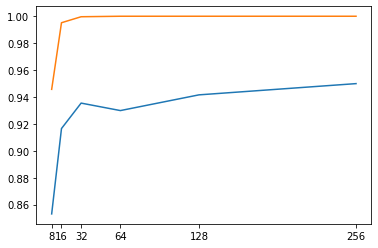

In [236]:
plt.plot(n_neirons,test_accs)
plt.plot(n_neirons,train_accs)
plt.xticks(n_neirons)

Although the model performs better on train data, it does not seem it has overfit, as test data performance also improves with higher number of neirons

### 4. Neural network with two hidden layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy.
Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [237]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train(data, target, n):
    nn = MLPClassifier(hidden_layer_sizes=(n,n))
    nn.fit(data, target)
    return nn

def test(model, test_data, target):
    predictions = model.predict(test_data)
    accuracy = accuracy_score(target, predictions)
    return accuracy
    
def cross_validate(data, taget, n):
    kf = KFold(n_splits=6)
    
    accuracies = []
    train_accuracies = [] #will be used to see if model overfits
    rmses = []
    
    for train_index, test_index in kf.split(data):
        test_data = data.iloc[test_index]
        test_labels = target.iloc[test_index]
        train_data = data.iloc[train_index]
        train_labels = target.iloc[train_index]
        
        model = train(train_data, train_labels, n)
        test_accuracy = test(model, test_data, test_labels)
        train_accuracy = test(model, train_data, train_labels)
        accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)  
    
    return np.mean(accuracies), np.mean(train_accuracies)

n_neirons_2l = [8, 32, 64, 128]
accs = [cross_validate(data, target, n) for n in n_neirons_2l]

test_accs_2l = [accs[i][0] for i in range(len(accs))]
train_accs_2l = [accs[i][1] for i in range(len(accs))]

/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [238]:
accs

[(0.8458825715347454, 0.944240951863674),
 (0.9432478632478632, 1.0),
 (0.9454793756967671, 1.0),
 (0.9538164251207729, 1.0)]

In [239]:
test_accs_2l

[0.8458825715347454,
 0.9432478632478632,
 0.9454793756967671,
 0.9538164251207729]

### 5. Neural network with three hidden layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [240]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train(data, target, n):
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n))
    nn.fit(data, target)
    return nn

def test(model, test_data, target):
    predictions = model.predict(test_data)
    accuracy = accuracy_score(target, predictions)
    return accuracy
    
def cross_validate(data, taget, n):
    kf = KFold(n_splits=6)
    
    accuracies = []
    train_accuracies = [] #will be used to see if model overfits
    rmses = []
    
    for train_index, test_index in kf.split(data):
        test_data = data.iloc[test_index]
        test_labels = target.iloc[test_index]
        train_data = data.iloc[train_index]
        train_labels = target.iloc[train_index]
        
        model = train(train_data, train_labels, n)
        test_accuracy = test(model, test_data, test_labels)
        train_accuracy = test(model, train_data, train_labels)
        accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
        
    
    return np.mean(accuracies), np.mean(train_accuracies)

n_neirons_3l = [8, 32, 64, 128]
accs = [cross_validate(data, target, n) for n in n_neirons_3l]

test_accs_3l = [accs[i][0] for i in range(len(accs))]
train_accs_3l = [accs[i][1] for i in range(len(accs))]

n_neirons

/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/serhio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

[8, 16, 32, 64, 128, 256]

In [241]:
accs

[(0.8725678186547751, 0.9794125411481619),
 (0.9337922705314011, 1.0),
 (0.9527034559643256, 1.0),
 (0.9638257153474544, 1.0)]

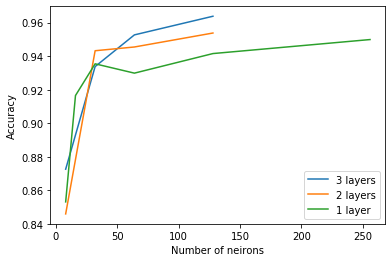

In [242]:
plt.plot(n_neirons_3l, test_accs_3l, label='3 layers')
plt.plot(n_neirons_2l, test_accs_2l, label='2 layers')
plt.plot(n_neirons, test_accs, label='1 layer')
plt.xlabel('Number of neirons')
plt.ylabel('Accuracy')
plt.legend()

In [243]:
accs

[(0.8725678186547751, 0.9794125411481619),
 (0.9337922705314011, 1.0),
 (0.9527034559643256, 1.0),
 (0.9638257153474544, 1.0)]

### 6. Next steps
In this guided project, we experimented with different models to classify handwritten digits. That's it for the guided steps.

Here are some next steps to try:

- Use the existing pipeline we've built to try other machine learning models:
    - Decision Tree Models
    - Random Forest Models
- Write up a summary of the effectiveness of the different models you tried, with data to back up the conclusions.
- Experiment with different activation functions to see if the accuracies improve.
- Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
    - [Visualization of MLP Weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

Curious to see what other students have done on this project? Head over to our [Community](https://community.dataquest.io/tags/c/social/share/49/244) to check them out. While you are there, please remember to show some love and give your own feedback!